**Solving Sudoku From Image Using Deep Learning**

Deep Learning is used in many applications such as object detection, face detection, natural language processing tasks, and many more. In this blog I am going to build a model that will be used to solve unsolved Sudoku puzzles from an image using deep learning, We are going to libraries such as OpenCV and TensorFlow


**IMPORTING LIBRARIES**

Let’s import all the required libraries using the below commands:

In [6]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-c1svyinx/tensorflow-gpu_44f4956629f74ac2b458144e92cb8354/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originat

In [7]:
pip install --no-deps tensorflow-io

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image



### import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
#from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule) import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

**Part 1: Digit Classification Model** 

In this section, we are going to use a digit classification model

**LOADING DATA**

We are going to use an image dataset to classify the numbers in an image. Data is specified as features like images and labels as tags.

In [9]:
#Loading the data 

data = os.listdir(r"../input/digits/Digits" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"../input/digits/Digits" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"../input/digits/Digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Datapoints = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Datapoints =  10160


**SPLITTING DATASET**

We are splitting the dataset into the train, test, and validation sets as we do in any machine learning problem.

In [10]:
#Spliting the train validation and test sets
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


**Preprocessing the images for neural net **

In a preprocessing step, we preprocess the features (images) into grayscale, normalizing and enhancing them with histogram equalization. After that, convert them to NumPp arrays then reshaping them and data augmentation.

In [11]:
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)
#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

**One Hot Encoding**

In this section, we are going to use one-hot encoding to labels the classes.

In [12]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

**MODEL BUILDING**

We are using a convolutional neural network for model building. It consists of the following steps:

In [13]:
#Creating a Neural Network
model = Sequential()
model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In this step, we are going to compile the model and testing the model on the test set as shown below:

In [14]:
#Compiling the model
'''lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)'''


optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
#Fit the model
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

# Testing the model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
200/200 - 75s - loss: 1.0630 - accuracy: 0.6395 - val_loss: 0.1049 - val_accuracy: 0.9632 - 75s/epoch - 373ms/step
Epoch 2/30
200/200 - 72s - loss: 0.3202 - accuracy: 0.8989 - val_loss: 0.0711 - val_accuracy: 0.9777 - 72s/epoch - 361ms/step
Epoch 3/30
200/200 - 72s - loss: 0.1996 - accuracy: 0.9351 - val_loss: 0.0442 - val_accuracy: 0.9850 - 72s/epoch - 361ms/step
Epoch 4/30
200/200 - 72s - loss: 0.1625 - accuracy: 0.9484 - val_loss: 0.0322 - val_accuracy: 0.9907 - 72s/epoch - 361ms/step
Epoch 5/30
200/200 - 72s - loss: 0.1549 - accuracy: 0.9531 - val_loss: 0.0310 - val_accuracy: 0.9886 - 72s/epoch - 360ms/step
Epoch 6/30
200/200 - 72s - loss: 0.1280 - accuracy: 0.9619 - val_loss: 0.0417 - val_accuracy: 0.9865 - 72s/epoch - 360ms/step
Epoch 7/30
200/200 - 72s - loss: 0.1140 - accuracy: 0.9668 - val_loss: 0.0383 - val_accuracy: 0.9860 - 72s/epoch - 361ms/step
Epoch 8/30
200/200 - 73s - loss: 0.1234 - accuracy: 0.9661 - val_loss: 0.0211 - val_accuracy: 0.9927 - 73s/epoch - 364

**Part 2: Reading and Detecting the Sudoku From an Image**

**READING THE SUDOKU PUZZLE**  

Read a Sudoku using OpenCv using the following code:

_280_187476.jpeg


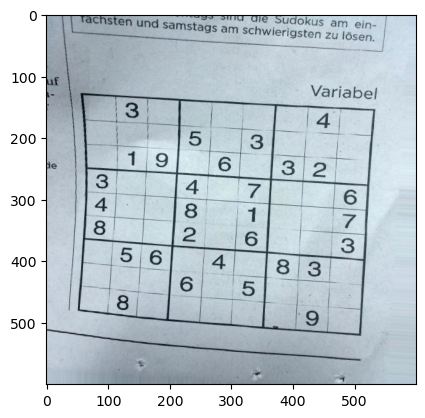

In [15]:
# Randomly select an image from the dataset 
folder="../input/sudoku-box-detection/aug"
a=random.choice(os.listdir(folder))
print(a)
sudoku_a = cv2.imread(folder+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show()

**DETECTING CONTOUR**

In this section, we are going to detect contour. We sill detect the biggest contour of the image

In [21]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()

contour, hierarchy = cv2.findContours(cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - findContours() missing required argument 'method' (pos 3)
>  - findContours() missing required argument 'method' (pos 3)


The following code is used to get the cropped and well-aligned Sudoku by reshaping it.

In [ ]:
def main_outline(contour):
biggest = np.array([])
max_area = 0
    for i in contour:
area = cv2.contourArea(i)
        if area >50:
peri = cv2.arcLength(i, True)
approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
biggest = approx
max_area = area
    return biggest ,max_area
def reframe(points):
points = points.reshape((4, 2))
points_new = np.zeros((4,1,2),dtype = np.int32)
add = points.sum(1)
points_new[0] = points[np.argmin(add)]
points_new[3] = points[np.argmax(add)]
diff = np.diff(points, axis =1)
points_new[1] = points[np.argmin(diff)]
points_new[2] = points[np.argmax(diff)]
    return points_new
def splitcells(img):
rows = np.vsplit(img,9)
boxes = []
    for r in rows:
cols = np.hsplit(r,9)
        for box in cols:
boxes.append(box)
    return boxes
black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
biggest = reframe(biggest)
cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
pts1 = np.float32(biggest)
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
  imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imagewrap)
plt.show()

In [ ]:
# Importing puzzle to be solved
puzzle = cv2.imread("su-puzzle/su.jpg")
#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

In [ ]:
# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)
black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
su_biggest = reframe(su_biggest)
cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
su_pts1 = np.float32(su_biggest)
su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

**SPLITTING THE CELLS AND CLASSIFYING DIGITS**

In this section, we are going to split the cells and classify the digits

* First split the Sudoku into 81 cells with digits or empty spaces
* Cropping the cells
* Using the model to classify the digits in the cells so that the empty cells are classified as zero
* Finally, detect the output in an array of 81 digits.

In [ ]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()

In [ ]:
def CropCell(cells):
Cells_croped = []
    for image in cells:
img = np.array(image)
img = img[4:46, 6:46]
img = Image.fromarray(img)
Cells_croped.append(img)
    return Cells_croped
sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()

**Part3: SOLVING THE SUDOKU**

In this section, we are going to perform two operations:

* Reshaping the array into a 9 x 9 matrix
* Solving the matrix using recursion

In [ ]:
# Reshaping the grid to a 9x9 matrix
grid = np.reshape(grid,(9,9))
grid

In [ ]:
#For compairing 
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

Check the below code for further solving the sudoku puzzle:

In [ ]:
def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False
#Function to fill in the possible values by evaluating rows collumns and smaller cells
def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n and row != i:
            return False
    for i in range (0,9):
        if quiz[i][col] == n and col != i:
            return False
row0 = (row)//3
col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n and (i,j) != (row, col):
                return False
    return True
#Recursion function to loop over untill a valid answer is found. 
def solve(quiz):
val = next_box(quiz)
    if val is False:
        return True
    else:
row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
quiz[row][col]=n
                if solve(quiz):
                    return True 
                else:
quiz[row][col]=0
        return 
def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
print("....................")
        for col in range(9):
            if col % 3 == 0 and col != 0:
print("|", end=" ")
            if col == 8:
print(quiz[row][col])
            else:
print(str(quiz[row][col]) + " ", end="")

In [ ]:
solve(grid)

Check the below code for final output:

In [ ]:
if solve(grid):
Solved(grid)
else:
print("Solution don't exist. Model misread digits.")